# Intersections

## Setup

In [31]:
from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
source = os.path.join(storage_path, "BAS_WIDTH", "20220614_Plate1058_width")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        with open(path) as f:
            json_from_file = json.load(f)
        segments[file] = {"main1": [], "main2": [], "son1": []}
        for shape in json_from_file["shapes"]:
            if shape["label"] in segments[file].keys():
                segments[file][shape["label"]].append(shape["points"])

In [4]:
segments['Image001.json']['main1']

[[[2010.9090909090908, 749.090909090909],
  [2008.4848484848483, 852.121212121212]],
 [[2316.0655737704915, 757.7049180327868],
  [2307.5409836065573, 863.6065573770491]],
 [[4027.631578947368, 893.4210526315788],
  [4021.929824561403, 997.8070175438595]]]

In [5]:
widths = {}

for key in segments.keys():
    widths[key] = {}
    for label in segments[key].keys():
        lengths = []
        for i in range(len(segments[key][label])):
            point1 = np.array(segments[key][label][i][0])
            point2 = np.array(segments[key][label][i][1])
            length = convert_to_micrometer(
                        np.linalg.norm(point1 - point2), magnification=50
                    )
            lengths.append(length)
        widths[key][label] = np.mean(lengths)

## Visualisation

In [6]:
main1 = [widths[key]['main1'] for key in widths.keys()]
main2 = [widths[key]['main2'] for key in widths.keys()]
son1 = [widths[key]['son1'] for key in widths.keys()]
x = list(range(len(widths.keys())))

<IPython.core.display.Javascript object>


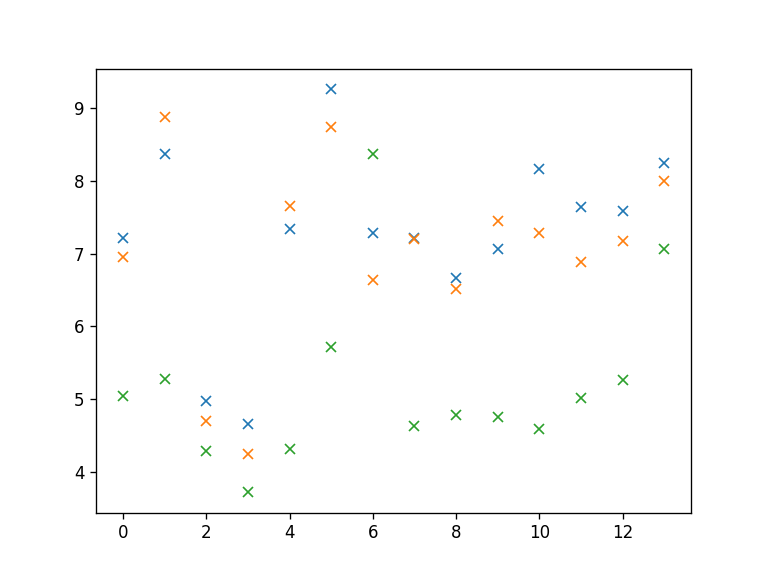

In [7]:
%matplotlib notebook
plt.plot(x, main1, marker = 'x', linestyle = "None")
plt.plot(x, main2, marker = 'x', linestyle = "None")
plt.plot(x, son1, marker = 'x', linestyle = "None")

### Tests statistiques

**Q1**: A-t-on main1 > main2 ?\
**Q2**: Si oui, quelle est la relation la mieux vérifiée du type $main_1^{a} = main_2^{a} + son_1^{a}$?

## Q1

$H_0$: There is no reduction at intersection\
$H_1$: There is a reduction at intersection

$X1$ = valeurs de la branche d'entrée\
$X2$ = valeurs de la branche de sortie\
$X = X1 - X2$\
$H_0$: $X$ suit une loi normale de moyenne 0 et d'écart type inconnu.\
$H_1$: $X$ suit une loi normale de moyenne supérieur à 0 et d'écart type inconnu\

In [33]:
X = np.array(main1) - np.array(main2)
S = np.var(X, ddof=0)

In [35]:
S

0.16250369481741614

In [34]:
np.mean(X)

0.23893626636453963

In [36]:
(np.mean(X)/S) * np.sqrt(13)

5.301399213803841

$\overline{X}/S*racine(n-1)$ suit une loi de student

In [24]:
from scipy.stats import t, ttest_1samp

In [42]:
ttest_1samp(X, popmean=0)

Ttest_1sampResult(statistic=2.137086639831958, pvalue=0.05217128299188655)

In [39]:
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns 

2.16 = 0.05
